In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [9]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [10]:
X.shape

(42000, 784)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 9)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_pred)

0.8488095238095238

In [30]:
y_test[2]

6

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

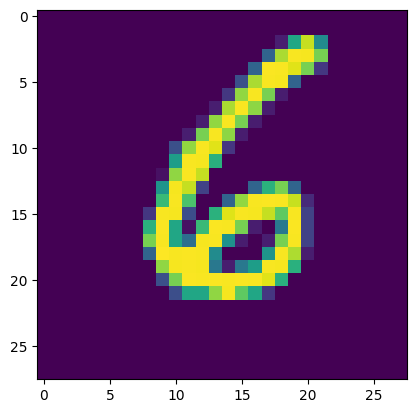

In [33]:
plt.imshow(X_test[2].reshape(28,28))

In [22]:
param_dist = {
    'criterion':['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7,8,9,None]
}

In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid = param_dist,n_jobs = -1,cv = 10)

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [27]:
grid.best_score_

0.8591666666666666

In [28]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [29]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')